In [226]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import os, pickle, sys
import seaborn as sns
from sklearn.manifold import TSNE
sns.set(style="whitegrid", palette="rainbow")

https://github.com/YosefLab/scVI

https://nbviewer.jupyter.org/github/YosefLab/scVI/blob/master/tests/notebooks/data_loading.ipynb

In [27]:
from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, DownloadableAnnDataset
from scvi.dataset import BrainLargeDataset, CortexDataset, PbmcDataset, RetinaDataset, HematoDataset, CbmcDataset, BrainSmallDataset, SmfishDataset
save_path = "data/"

# smFISH
http://linnarssonlab.org/osmFISH/

In [121]:
smfish_dataset = SmfishDataset(save_path=save_path)

[2019-12-22 18:34:15,119] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/osmFISH_SScortex_mouse_all_cell.loom already downloaded
[2019-12-22 18:34:15,122] INFO - scvi.dataset.smfish | Loading smFISH dataset
[2019-12-22 18:34:15,216] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-12-22 18:34:15,223] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-12-22 18:34:15,226] INFO - scvi.dataset.dataset | Downsampled from 6471 to 4530 cells
[2019-12-22 18:34:15,227] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-12-22 18:34:15,231] INFO - scvi.dataset.dataset | Remapping labels to [0,N]


In [122]:
smfish_dataset

GeneExpressionDataset object with n_cells x nb_genes = 4530 x 33
    gene_attribute_names: 'gene_names'
    cell_attribute_names: 'local_means', 'batch_indices', 'y_coord', 'local_vars', 'x_coord', 'labels'
    cell_categorical_attribute_names: 'batch_indices', 'labels'

In [211]:
set(smfish_dataset.labels.flatten())

{0, 1, 2, 3, 4, 5}

In [214]:
X_tsne2 = TSNE(n_components=2).fit_transform(cortex_dataset.X)

(33, 33)

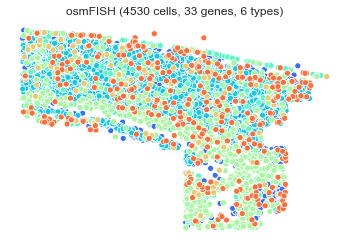

In [270]:
colormap = dict(zip(range(6), sns.color_palette("Paired", 9)))
tmp_df = pd.DataFrame(data={"X":smfish_dataset.x_coord.flatten(), "Y":smfish_dataset.y_coord.flatten(), "Type":[colormap[x] for x in smfish_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("osmFISH (4530 cells, 33 genes, 6 types)")
plt.legend(list(range(6)))
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/osmFISH.pdf", bbox_inches='tight')

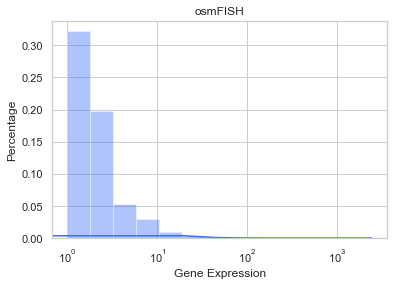

In [219]:
sns.distplot(osmFISH_dataset.X.flatten(), label="osmFISH", bins=np.logspace(0,np.log(10),10))
plt.title("osmFISH")
plt.xlabel("Gene Expression")
plt.ylabel("Percentage")
plt.xscale("log")
plt.savefig("figure/dist/osmFISH.pdf", bbox_inches='tight')

In [75]:
?sns.distplot

# Cortex

In [50]:
cortex_dataset = CortexDataset(save_path=save_path, total_genes=558) 

[2019-12-22 17:49:42,764] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/expression.bin
[2019-12-22 17:49:54,730] INFO - scvi.dataset.cortex | Loading Cortex data
[2019-12-22 17:50:05,379] INFO - scvi.dataset.cortex | Finished preprocessing Cortex data
[2019-12-22 17:50:05,396] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-12-22 17:50:05,397] INFO - scvi.dataset.dataset | Remapping labels to [0,N]


In [239]:
cortex_dataset

GeneExpressionDataset object with n_cells x nb_genes = 3005 x 558
    gene_attribute_names: 'gene_names'
    cell_attribute_names: 'local_means', 'batch_indices', 'local_vars', 'labels', 'precise_labels'
    cell_categorical_attribute_names: 'batch_indices', 'labels'

In [242]:
set(list(cortex_dataset.labels.flatten().astype(str)))

{'0', '1', '2', '3', '4', '5', '6'}

In [265]:
X_tsne2 = TSNE(n_components=2).fit_transform(cortex_dataset.X)

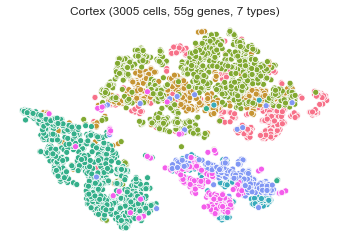

In [269]:
colormap = dict(zip(range(7), sns.color_palette("Paired", 7)))
tmp_df = pd.DataFrame(data={"X":list(X_tsne2[:, 0]), "Y":list(X_tsne2[:, 1]), "Type":[colormap[x] for x in cortex_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("Cortex (3005 cells, 55g genes, 7 types)")
plt.legend(list(range(7)))
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/Cortex.pdf", bbox_inches='tight')

# PBMC

In [43]:
pbmc_dataset = PbmcDataset(save_path=save_path, save_path_10X=os.path.join(save_path, "10X"))

[2019-12-22 17:21:04,914] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/gene_info_pbmc.csv
[2019-12-22 17:24:13,513] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/pbmc_metadata.pickle
[2019-12-22 17:40:40,588] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz
[2019-12-22 17:43:35,832] INFO - scvi.dataset.dataset10X | Preprocessing dataset
[2019-12-22 17:43:35,836] INFO - scvi.dataset.dataset10X | Extracting tar file
[2019-12-22 17:43:55,850] INFO - scvi.dataset.dataset10X | Finished preprocessing dataset
[2019-12-22 17:43:55,978] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-12-22 17:43:55,980] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-12-22 17:43:56,025] INFO - scvi.dataset.dataset | Computing the library size f

In [47]:
pbmc_dataset

GeneExpressionDataset object with n_cells x nb_genes = 11990 x 3346
    gene_attribute_names: 'gene_names'
    cell_attribute_names: 'local_means', 'batch_indices', 'local_vars', 'barcodes', 'labels'
    cell_categorical_attribute_names: 'batch_indices', 'labels'

In [205]:
pbmc_dataset.gene_names

array(['ENSG00000188976', 'ENSG00000187608', 'ENSG00000149527', ...,
       'ENSG00000160299', 'ENSG00000160305', 'ENSG00000160307'],
      dtype='<U64')

In [ ]:
X_tsne_pbmc = TSNE(n_components=2).fit_transform(pbmc_dataset.X.toarray())

In [197]:
set(list(pbmc_dataset.labels.flatten().astype(str)))

{'0', '1', '2', '3', '4', '5', '6', '7', '8'}

In [ ]:
colormap = dict(zip(range(9), sns.color_palette("Paired", 9)))
tmp_df = pd.DataFrame(data={"X":list(X_tsne_pbmc[:, 0]), "Y":list(X_tsne_pbmc[:, 1]), "Type":[colormap[x] for x in pbmc_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("PBMC (11990 cells, 3345 genes, 9 types)")
plt.legend(list(range(9)))
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/PBMC.pdf", bbox_inches='tight')

# HEMATO

In [248]:
hemato_dataset = HematoDataset(save_path=os.path.join(save_path, 'HEMATO/')) 

[2019-12-23 01:46:53,716] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/HEMATO/bBM.raw_umifm_counts.csv.gz
[2019-12-23 01:47:10,820] INFO - scvi.dataset.dataset | Downloading file at /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/HEMATO/data.zip
[2019-12-23 01:47:27,134] INFO - scvi.dataset.hemato | Preprocessing Hemato data
[2019-12-23 01:49:12,003] INFO - scvi.dataset.hemato | Finished preprocessing Hemato data
[2019-12-23 01:49:12,503] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-12-23 01:49:12,505] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-12-23 01:49:12,560] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-12-23 01:49:12,610] INFO - scvi.dataset.dataset | Downsampled from 4016 to 4016 cells


In [263]:
hemato_dataset

GeneExpressionDataset object with n_cells x nb_genes = 4016 x 7397
    gene_attribute_names: 'gene_names'
    cell_attribute_names: 'local_means', 'batch_indices', 'y_coord', 'local_vars', 'x_coord', 'labels'
    cell_categorical_attribute_names: 'batch_indices', 'labels'

In [253]:
sorted(set(hemato_dataset.labels.flatten()))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [272]:
X_tsne_hemato = TSNE(n_components=2).fit_transform(hemato_dataset.X)

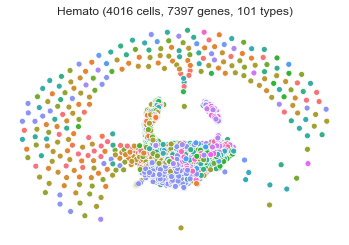

In [273]:
colormap = dict(zip(range(101), sns.color_palette("rainbow", 101)))
tmp_df = pd.DataFrame(data={"X":list(X_tsne_hemato[:, 0]), "Y":list(X_tsne_hemato[:, 1]), "Type":[colormap[x] for x in hemato_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("Hemato (4016 cells, 7397 genes, 101 types)")
plt.legend(list(range(101))).remove()
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/Hemato.pdf", bbox_inches='tight')